In [53]:
import torch
from torch import nn

import matplotlib.pyplot as plt

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

print(f"Pytorch version: {torch.__version__}\ntorchvision version:{torchvision.__version__}")

Pytorch version: 2.1.0+cu121
torchvision version:0.16.0+cu121


In [54]:
data = "/content/data"
train_data = datasets.MNIST(
    root=data,
    train= True,
    transform=ToTensor(),
    download=True,
    target_transform=None
)

test_data = datasets.MNIST(
    root=data,
    train=False,
    transform=ToTensor(),
    download=True
)

In [55]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

train_data[0] means the tensor values of the first indexed image in the MNIST Dataset.

In [56]:
image.shape

torch.Size([1, 28, 28])

First output being the [color channel = 1], which means the image is grayscale.
Second output is width = 28 and third output is height = 28.

In [57]:
print(f"The length of the training data:{len(train_data.data)}\nThe length of the test data:{(len(test_data.data))}")

The length of the training data:60000
The length of the test data:10000


In [58]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [59]:
import matplotlib.pyplot as plt
image, label = train_data[0]
#print(f"İmage shape: {(train_data[0].shape)}")

This wont work because on the 3rd line we request the shape of first indexed train data.

But train_data[0] outputs both image and a label. We need to indicate that we want the shape of the "image".

Image shape:torch.Size([1, 28, 28])


Text(0.5, 1.0, '1')

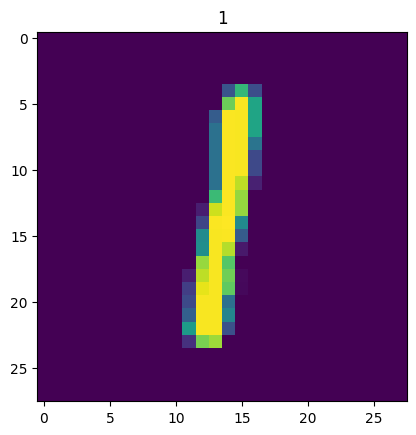

In [60]:
import matplotlib.pyplot as plt
image, label = train_data[45254]
print(f"Image shape:{image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

Because we are using color channel = 1 we will most likely be using a grayscale image rather than the color we plottted.

In order the achieve that we can simply use cmap="gray".

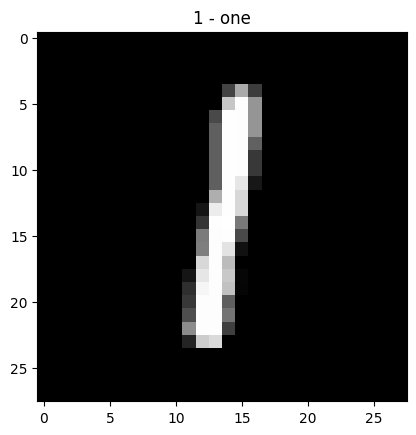

In [61]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

In [62]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, #Dataset to iterate on for the according batch size.
                              batch_size = BATCH_SIZE, #Size of every single iteration.
                              shuffle = True, #To make the loaded data selecte randomly.
                              )
test_dataloader = DataLoader(test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = True)

print(f"For training data there is {len(train_dataloader)} iterations with the batch size of {BATCH_SIZE}.")
print(f"For testing data there is {len(test_dataloader)} iterations with the batch size of {BATCH_SIZE}.")

For training data there is 1875 iterations with the batch size of 32.
For testing data there is 313 iterations with the batch size of 32.


In [63]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

This output means the shape of the image is batch:32, color_channel:1, width:28, height:28.

But for labels there is only one dimension of course and thats the tag.


To show there was no changes to our data at all.

Image shape:torch.Size([1, 28, 28])
Label number:7, Label class:7 - seven, Label shape: torch.Size([])


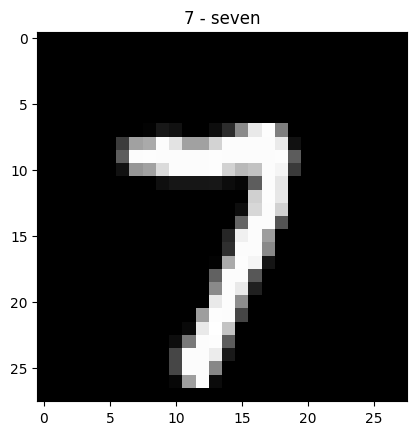

In [64]:
torch.manual_seed(3456)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx] , train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label]);
#plt.axis("Off")
print(f"Image shape:{img.shape}")
print(f"Label number:{label}, Label class:{class_names[label]}, Label shape: {label.shape}")

In [65]:
flatten_model = nn.Flatten() #Created a layer to flatten our data.

x = train_features_batch[0]

output = flatten_model(x)

print(f"Shape before flattening:{x.shape}")
print(f"Shape after flattening:{output.shape}")

Shape before flattening:torch.Size([1, 28, 28])
Shape after flattening:torch.Size([1, 784])


*   We succesfully outputted a single layered matrix instead of multi-dimensional one.
*   We can now use this as our first layer and move on.

In [66]:
from torch import nn
class DigitRecognizerMNIST(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )
  def forward(self, x):
    return self.layer_stack(x)

We created our first model class. We will input our model from this base and get the output as we like.

In [67]:
torch.manual_seed(42)

model_0 = DigitRecognizerMNIST(input_shape=784,
                               hidden_units=10,
                               output_shape=len(class_names)
).to("cpu")
model_0


DigitRecognizerMNIST(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

For our model we need


1.   Accuracy Metric
2.   Loss Function
3.   Optimizer Function





In [68]:
def accuracy_func(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [69]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

For our model the best way to set loss_func is using CrossEntropyLoss()
For our optimizer we use SGD refer to google for more information.

SGD => Implements stochastic gradient descent (optionally with momentum).

We also need a timer to check our timing qualities.

In [70]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time
# Imported from learnpytorch.io directly...

In [71]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 10

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_loss = 0

  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    y_pred = model_0(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss /= len(train_dataloader)

  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      test_pred = model_0(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_func(y_true=y, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.40511 | Test loss: 0.29504, Test acc: 91.68%

Epoch: 1
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.30832 | Test loss: 0.29820, Test acc: 91.62%

Epoch: 2
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.29602 | Test loss: 0.29173, Test acc: 91.93%

Epoch: 3
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.28976 | Test loss: 0.28150, Test acc: 92.09%

Epoch: 4
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samp